## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read preprocessed CSV into dataframe

In [2]:
locations = pd.read_csv('data/processed/c101.csv')
locations.head(10)

Unnamed: 0  CustomerNO   Lng   Lat  Demand  ReadyTime     Due  ServiceTime
0           0           1  40.0  50.0     0.0        0.0  1236.0          0.0
1           1           2  45.0  68.0    10.0      912.0   967.0         90.0
2           2           3  45.0  70.0    30.0      825.0   870.0         90.0
3           3           4  42.0  66.0    10.0       65.0   146.0         90.0
4           4           5  42.0  68.0    10.0      727.0   782.0         90.0
5           5           6  42.0  65.0    10.0       15.0    67.0         90.0
6           6           7  40.0  69.0    20.0      621.0   702.0         90.0
7           7           8  40.0  66.0    20.0      170.0   225.0         90.0
8           8           9  38.0  68.0    20.0      255.0   324.0         90.0
9           9          10  38.0  70.0    10.0      534.0   605.0         90.0

## Plot locations
### Remove depot from locations to plot it as an own point

In [3]:
depot = locations.iloc[0]

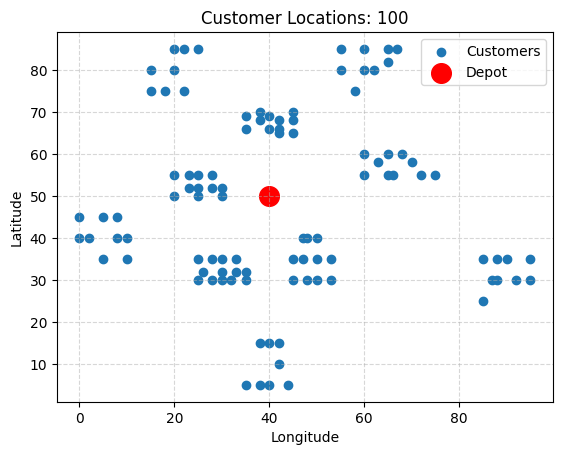

In [4]:
plt.title(f'Customer Locations: {len(locations) - 1}')
plt.scatter(locations.iloc[1:]['Lng'], locations.iloc[1:]['Lat'])
plt.scatter(depot['Lng'], depot['Lat'], color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Customers', 'Depot'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Run ACO algorithm

In [5]:
from sia.aco import ACO, ACOParameters

n_locations = len(locations)
alpha = 0.9
beta = 2.0
evaporation_rate = 0.5

n_vehicles_aco = 15
n_iterations_aco = 100
max_capacity_aco = 200

# Initialize parameters and ACO algorithm
aco_params = ACOParameters(n_locations=n_locations, alpha=alpha, beta=beta, evaporation_rate=evaporation_rate)
aco = ACO(locations_df=locations, n_vehicles=n_vehicles_aco, n_iterations=n_iterations_aco, aco_params=aco_params, max_capacity=max_capacity_aco)

# Run ACO
vehicle_solutions_aco, best_distances_aco, time_window_violations_aco, max_customers_visited_aco, total_distances_aco, best_solution_index_aco = aco.optimize()

______________________________________________ITERATION 1______________________________________________
VEHICLE 1
Visiting customer 5 with current time 0.0, travel time 15.132745950421556, demand 10.0
Arrived on time at 5
Remaining capacity 190.0, unvisited customers: {1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Visiting customer 3 with current time 105.13274595042155, travel time 1.0, demand 10.0
Arrived on time at 3
Remaining capacity 180.0, unvisited customers: {1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 

## Print and plot results

Best solution (Index: 68)
Route 1: 67 -> 65 -> 63 -> 62 -> 74 -> 72 -> 61 -> 64 -> 68 -> 66 -> 69 | Distance travelled: 59.40 | Time window violations: 0
Route 2: 5 -> 3 -> 7 -> 8 -> 10 -> 11 -> 9 -> 6 -> 4 -> 2 -> 1 -> 75 | Distance travelled: 59.62 | Time window violations: 0
Route 3: 43 -> 42 -> 41 -> 40 -> 44 -> 46 -> 45 -> 48 -> 51 -> 50 -> 52 -> 49 -> 47 | Distance travelled: 64.81 | Time window violations: 0
Route 4: 90 -> 87 -> 86 -> 83 -> 82 -> 84 -> 85 -> 88 -> 89 -> 91 | Distance travelled: 76.07 | Time window violations: 0
Route 5: 20 -> 24 -> 25 -> 27 -> 29 -> 30 -> 28 -> 26 -> 23 -> 22 -> 21 | Distance travelled: 50.80 | Time window violations: 0
Route 6: 98 -> 96 -> 95 -> 94 -> 92 -> 93 -> 97 -> 100 -> 99 | Distance travelled: 95.94 | Time window violations: 0
Route 7: 13 -> 17 -> 18 -> 19 -> 15 -> 16 -> 14 -> 12 | Distance travelled: 95.88 | Time window violations: 0
Route 8: 32 -> 33 -> 31 -> 35 -> 37 -> 38 -> 39 -> 36 -> 34 | Distance travelled: 97.23 | Time window vi

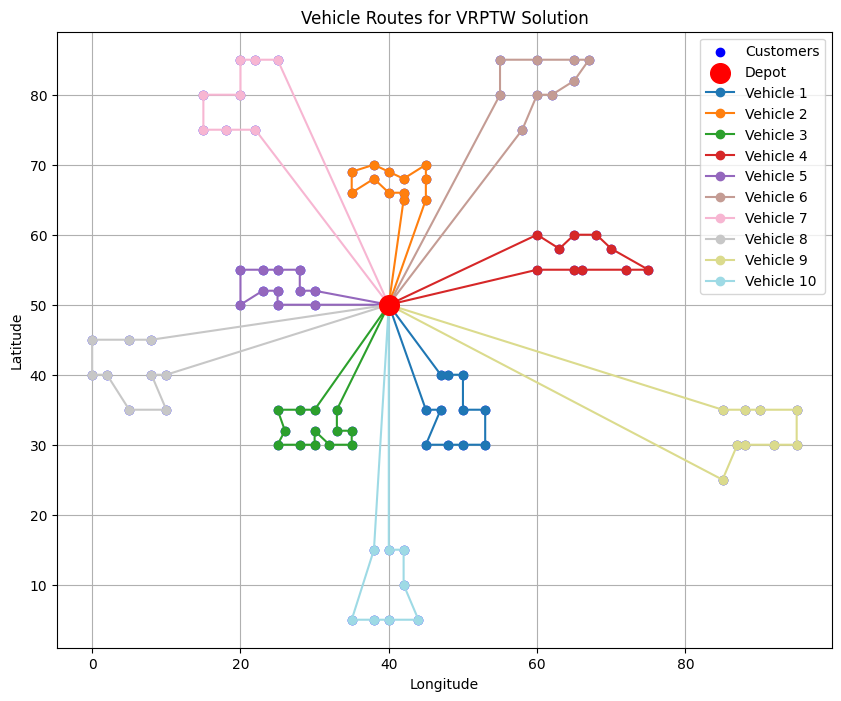

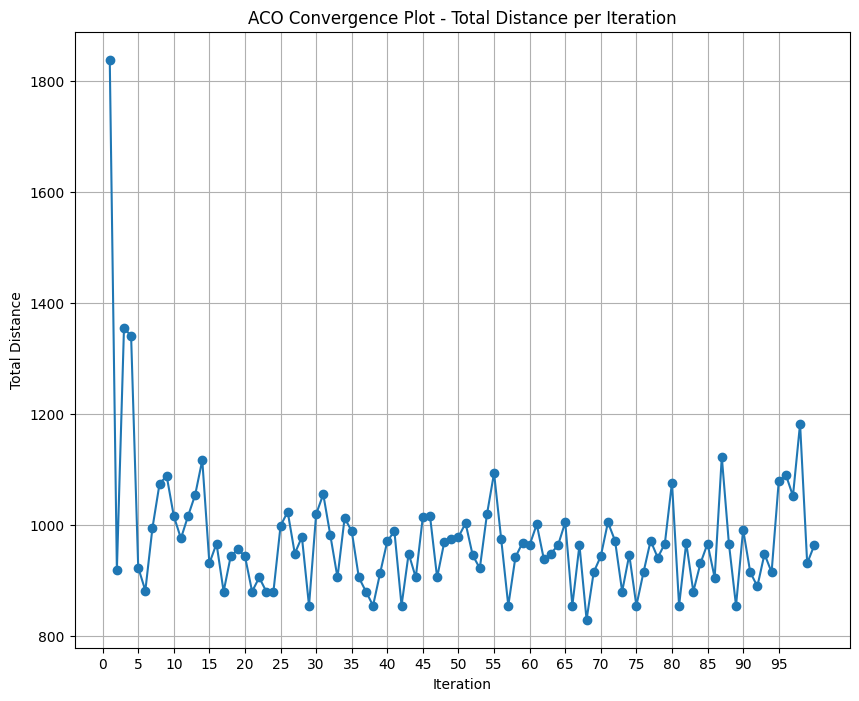

In [6]:
from utils.plotters.solution_visualizer import print_solutions, plot_vehicle_routes, plot_convergence

print_solutions(vehicle_solutions_aco, best_distances_aco, time_window_violations_aco, max_customers_visited_aco, best_solution_index_aco)
plot_vehicle_routes(locations, vehicle_solutions_aco)
plot_convergence(total_distances_aco, n_iterations_aco)